In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import scipy.signal as signal
from scipy import sparse
from scipy.sparse.linalg import spsolve
import glob

In [3]:
all_power= np.load('D:\Imprint-CMCL-Data\koushik\patient_id_6\sub_band_power\\all_powers.npy')

In [9]:
print np.shape(all_power)
##1-D-Channel no. , 2-D-actions-a,b,... , 3-D- 5days*2 for a and aa of each day, 4-D-5powers-delta, theta, alpha, beta, gamma

(21L, 7L, 10L, 5L)


In [25]:
spr_channels=[0,2,7,9,11,13,15,62,25,27,29,31,33,63,43,45,47,49,51,57,59]
spr_channels=np.array(spr_channels)
spr_channel_names=['fp1','fp2','f7','f3','fz','f4','f8','A1','T3','C3','Cz','C4','T4','A2','T5','P3','Pz','P4','T6'
                  ,'O1','O2']

In [11]:
right_hem=[2, 13, 15, 31, 33, 63, 49, 51, 59]
right_hem_names=['fp2', 'f4', 'f8', 'C4', 'T4', 'A2', 'P4', 'T6', 'O2']
left_hem=[0, 7, 9, 62, 25, 27, 43, 45, 57]
left_hem_names=['fp1', 'f7', 'f3', 'A1', 'T3', 'C3', 'T5', 'P3', 'O1']

In [31]:
mean_right_hem=np.zeros(np.shape(all_power[0]))
mean_left_hem=np.zeros(np.shape(all_power[0]))
for i in right_hem:
    r=np.where(spr_channels==i)
    mean_right_hem=mean_right_hem+all_power[r[0][0]]/len(right_hem)
    
for i in left_hem:
    l=np.where(spr_channels==i)
    mean_left_hem=mean_left_hem+all_power[l[0][0]]/len(left_hem)

In [30]:
r=np.where(spr_channels==2)
print r[0][0]

1


In [32]:
print mean_right_hem[0]
    

[[6.82044309e+00 1.78814116e+01 1.02589786e+01 4.04874527e+00
  1.82622015e+00]
 [1.13331315e+02 2.17131911e+01 1.11598077e+01 3.57024165e+00
  9.90986522e-01]
 [1.03822790e+01 8.11052402e+00 7.50018251e+00 2.35082574e+00
  1.03837984e+00]
 [9.59639327e+00 7.51268970e+00 8.60682366e+00 2.27331684e+00
  6.54087899e-01]
 [2.12561396e+03 3.05269273e+01 1.78824291e+01 6.13803090e+00
  3.53272462e+04]
 [2.50307824e+03 3.16844321e+01 1.40492845e+01 5.52785640e+00
  4.53843632e+04]
 [1.07404464e+03 9.34947388e+00 1.73399263e+01 4.19598710e+00
  1.19635666e+00]
 [1.79662653e+01 8.91987131e+00 1.60999717e+01 4.33030780e+00
  1.41316227e+00]
 [4.41462858e+00 4.68867820e+00 1.20942752e+01 4.51810280e+00
  1.17169549e+00]
 [2.80118920e+00 6.04518755e+00 1.52979390e+01 5.15629079e+00
  1.48919858e+00]]


In [34]:
print len(mean_left_hem[0])

10


In [42]:
mean_alpha_a_right_pre=[] 
mean_alpha_a_right_post=[]
mean_alpha_a_left_post=[]
mean_alpha_a_left_pre=[]
mean_beta_a_right_pre=[] 
mean_beta_a_right_post=[]
mean_beta_a_left_post=[]
mean_beta_a_left_pre=[]
mean_delta_a_right_pre=[] 
mean_delta_a_right_post=[]
mean_delta_a_left_post=[]
mean_delta_a_left_pre=[]
mean_theta_a_right_pre=[] 
mean_theta_a_right_post=[]
mean_theta_a_left_post=[]
mean_theta_a_left_pre=[]
for i in range(0, len(mean_right_hem[0]), 2):
    
    mean_alpha_a_right_pre.append(mean_right_hem[0][i][2])
    mean_alpha_a_left_pre.append(mean_left_hem[0][i][2])
    mean_alpha_a_left_post.append(mean_left_hem[0][i+1][2])
    mean_alpha_a_right_post.append(mean_right_hem[0][i+1][2])
    
    mean_beta_a_right_pre.append(mean_right_hem[0][i][3])
    mean_beta_a_left_pre.append(mean_left_hem[0][i][3])
    mean_beta_a_left_post.append(mean_left_hem[0][i+1][3])
    mean_beta_a_right_post.append(mean_right_hem[0][i+1][3])
    
    mean_delta_a_right_pre.append(mean_right_hem[0][i][0])
    mean_delta_a_left_pre.append(mean_left_hem[0][i][0])
    mean_delta_a_left_post.append(mean_left_hem[0][i+1][0])
    mean_delta_a_right_post.append(mean_right_hem[0][i+1][0])
    
    mean_theta_a_right_pre.append(mean_right_hem[0][i][1])
    mean_theta_a_left_pre.append(mean_left_hem[0][i][1])
    mean_theta_a_left_post.append(mean_left_hem[0][i+1][1])
    mean_theta_a_right_post.append(mean_right_hem[0][i+1][1])


In [43]:
mean_alpha_b_right_pre=[] 
mean_alpha_b_right_post=[]
mean_alpha_b_left_post=[]
mean_alpha_b_left_pre=[]
mean_beta_b_right_pre=[] 
mean_beta_b_right_post=[]
mean_beta_b_left_post=[]
mean_beta_b_left_pre=[]
mean_delta_b_right_pre=[] 
mean_delta_b_right_post=[]
mean_delta_b_left_post=[]
mean_delta_b_left_pre=[]
mean_theta_b_right_pre=[] 
mean_theta_b_right_post=[]
mean_theta_b_left_post=[]
mean_theta_b_left_pre=[]
for i in range(0, len(mean_right_hem[0]), 2):
    
    mean_alpha_b_right_pre.append(mean_right_hem[1][i][2])
    mean_alpha_b_left_pre.append(mean_left_hem[1][i][2])
    mean_alpha_b_left_post.append(mean_left_hem[1][i+1][2])
    mean_alpha_b_right_post.append(mean_right_hem[1][i+1][2])
    
    mean_beta_b_right_pre.append(mean_right_hem[1][i][3])
    mean_beta_b_left_pre.append(mean_left_hem[1][i][3])
    mean_beta_b_left_post.append(mean_left_hem[1][i+1][3])
    mean_beta_b_right_post.append(mean_right_hem[1][i+1][3])
    
    mean_delta_b_right_pre.append(mean_right_hem[1][i][0])
    mean_delta_b_left_pre.append(mean_left_hem[1][i][0])
    mean_delta_b_left_post.append(mean_left_hem[1][i+1][0])
    mean_delta_b_right_post.append(mean_right_hem[1][i+1][0])
    
    mean_theta_b_right_pre.append(mean_right_hem[1][i][1])
    mean_theta_b_left_pre.append(mean_left_hem[1][i][1])
    mean_theta_b_left_post.append(mean_left_hem[1][i+1][1])
    mean_theta_b_right_post.append(mean_right_hem[1][i+1][1])

<BarContainer object of 5 artists>

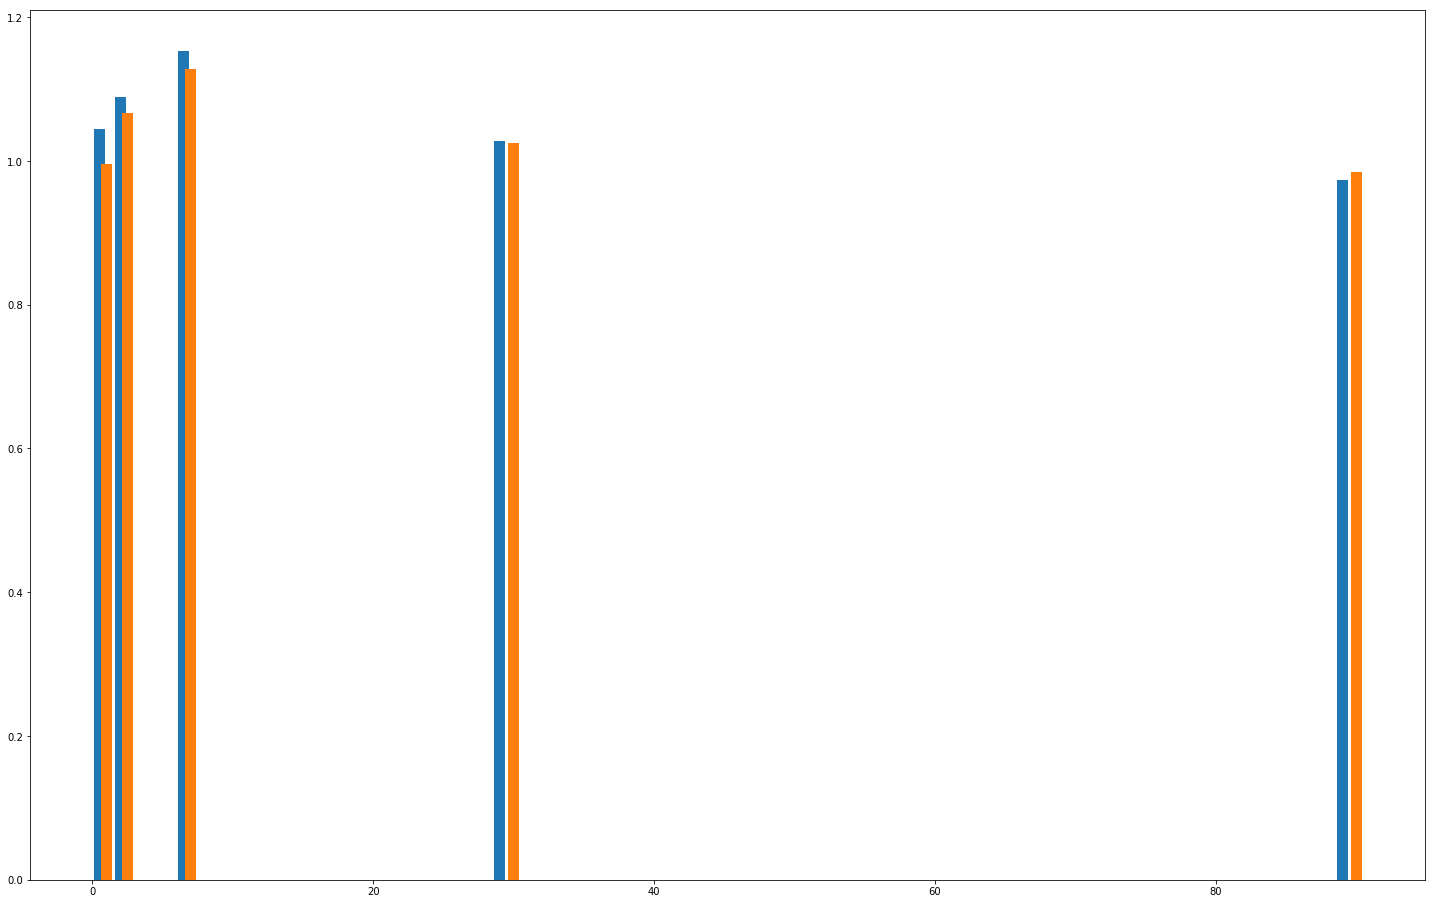

In [61]:
plt.rcParams["figure.figsize"] = [25,16]
plt.bar([0.5,2,6.5,29,89], np.array(mean_alpha_a_left_post)/np.array(mean_alpha_a_right_post))
plt.bar([1,2.5,7,30,90], np.array(mean_alpha_a_left_pre)/np.array(mean_alpha_a_right_pre))

In [46]:
np.array(mean_alpha_a_left_post)/np.array(mean_alpha_a_left_pre)

array([1.14104439, 1.17050402, 0.80265052, 0.93140927, 1.25160765])